In [105]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf

import numpy as np

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.2.0


In [183]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://nrvis.com/data/mldata/auto-mpg.csv")
dataset_path

'/Users/jonatasilva/.keras/datasets/auto-mpg.data'

In [184]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin','car']
dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)

In [185]:
dataset.pop('car')
dataset = dataset.iloc[1:]

In [186]:
dataset = dataset.astype(float)

In [187]:
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
1,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
2,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
3,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
4,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
5,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0
...,...,...,...,...,...,...,...,...
394,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0
395,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0
396,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0
397,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0


In [188]:
# column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
#                 'Acceleration', 'Model Year', 'Origin','car']
# raw_dataset = pd.read_csv(dataset_path, names=column_names,
#                       na_values = "?", comment='\t',
#                       sep=",", skipinitialspace=True)

# dataset = raw_dataset.copy()
# dataset.tail()

In [189]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          6
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [190]:
dataset = dataset.dropna()

In [191]:
origin = dataset.pop('Origin')

In [192]:
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail()

/Users/jonatasilva/Documents/ProjetosPython/python/venv37/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/jonatasilva/Documents/ProjetosPython/python/venv37/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/jonatasilva/Documents/ProjetosPython/python/venv37/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is tr

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
394,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0,0.0,0.0
395,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,0.0,1.0,0.0
396,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0,0.0,0.0
397,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0,0.0,0.0
398,31.0,4.0,119.0,82.0,2720.0,19.4,82.0,1.0,0.0,0.0


In [193]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

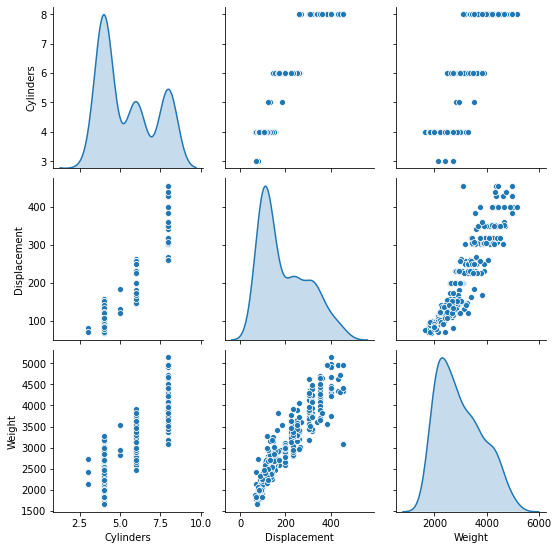

In [199]:
sns.pairplot(train_dataset[["Cylinders", "Displacement", "Weight"]], diag_kind="kde")


In [194]:
train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]].describe()

,MPG,Cylinders,Displacement,Weight
count,314.000000,314.000000,314.000000,314.000000
mean,23.310510,5.477707,195.318471,2990.251592
std,7.728652,1.699788,104.331589,843.898596
min,10.000000,3.000000,68.000000,1649.000000
25%,17.000000,4.000000,105.500000,2256.500000
50%,22.000000,4.000000,151.000000,2822.500000
75%,28.950000,8.000000,265.750000,3608.000000
max,46.600000,8.000000,455.000000,5140.000000


In [195]:
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [196]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

In [197]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [200]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [201]:
model = build_model()

In [202]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [203]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.08156028],
       [-0.26485732],
       [ 0.5813797 ],
       [-0.33942384],
       [-0.34088123],
       [-0.24515551],
       [-0.38483083],
       [-0.4660043 ],
       [-0.02188861],
       [-0.36820966]], dtype=float32)

In [204]:
# Mostra o progresso do treinamento imprimindo um único ponto para cada epoch completada
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [205]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.746403,1.030553,2.746403,9.027112,2.322115,9.027112,995
996,2.600132,1.007043,2.600132,9.097480,2.358894,9.097480,996
997,2.605658,1.020805,2.605658,8.955514,2.330340,8.955514,997
998,2.857488,1.064662,2.857488,8.784903,2.221825,8.784903,998
999,2.563837,1.013714,2.563837,9.129060,2.359097,9.129060,999


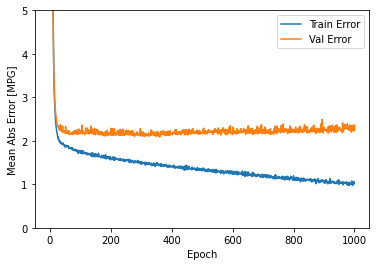

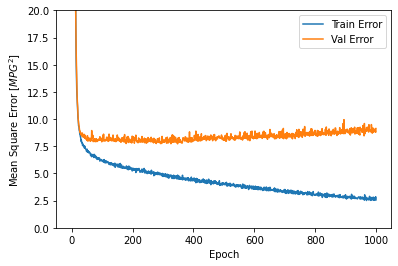

In [206]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)


...............................................................................................

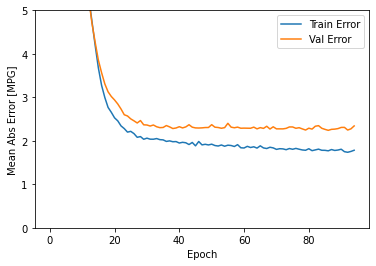

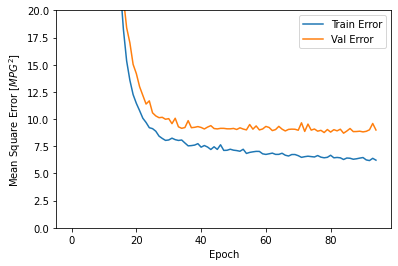

In [207]:
model = build_model()

# O paramêtro patience é o quantidade de epochs para checar as melhoras
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [208]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

3/3 - 0s - loss: 5.7729 - mae: 1.8467 - mse: 5.7729
Testing set Mean Abs Error:  1.85 MPG


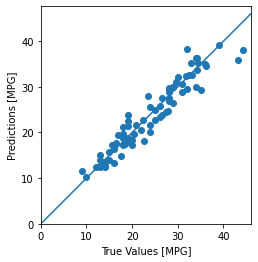

In [209]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

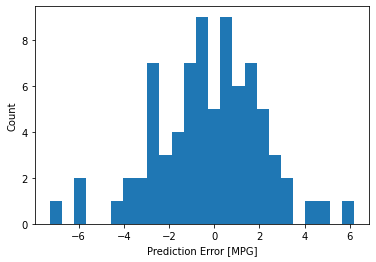

In [210]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")